In [1]:
from patchedimage import PatchedImage
from utilities import *

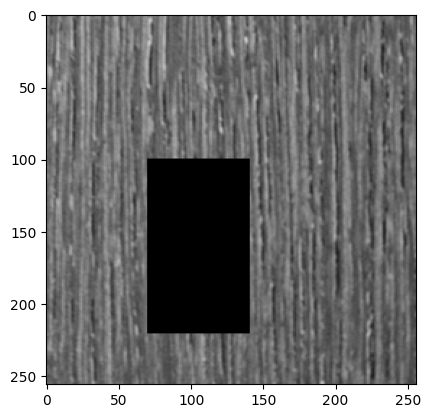

In [10]:
imgp = PatchedImage("images/bois.tif",5)
masque = masque_carre((100,70),(220,140),imgp.img.shape)
imgp.set_masque(masque,leaf_size=128)#+masque_circulaire((20,50),15,imgp.img.shape))
imgp.set_priorities()
imgp.show_img()

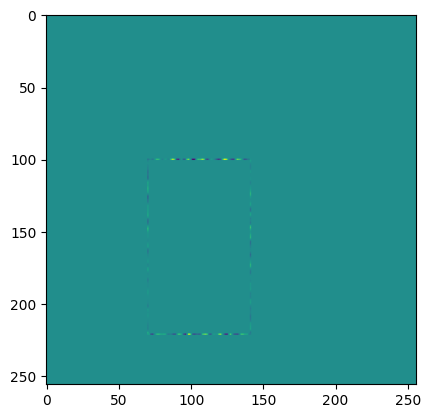

In [11]:
plt.imshow(imgp.priority)

In [12]:
for i in range(200):
    try:
        i,j = imgp.find_max_priority()
    except ValueError:
        break
    imgp.reconstruction((i,j))
    imgp.set_priorities()

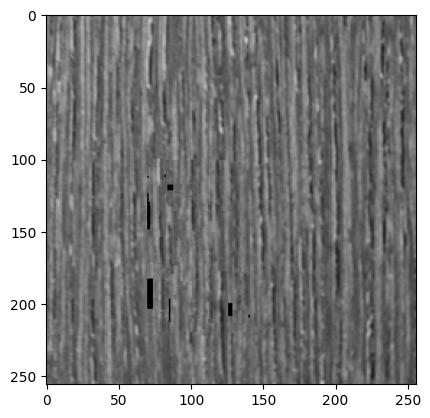

In [13]:
imgp.show_img()